In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Downloads\Coal Data\Coal (API4) FOB Richards Bay (ARGUS-McCloskey) Futures Historical Data.csv')

In [3]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 03, 2017",84.05,84.05,84.05,84.05,0.25K,1.27%
1,"Jan 04, 2017",83.50,83.50,83.50,83.50,0.10K,-0.65%
2,"Jan 05, 2017",83.60,83.60,83.60,83.60,0.12K,0.12%
3,"Jan 06, 2017",83.05,83.05,83.05,83.05,0.05K,-0.66%
4,"Jan 09, 2017",82.45,82.45,82.45,82.45,0.01K,-0.72%


In [4]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1218,"Nov 08, 2021",149.00,149.00,149.00,149.00,-,3.65%
1219,"Nov 09, 2021",146.00,146.00,146.00,146.00,-,-2.01%
1220,"Nov 10, 2021",139.50,139.50,139.50,139.50,-,-4.45%
1221,"Nov 11, 2021",136.75,136.75,136.75,136.75,-,-1.97%
1222,"Nov 12, 2021",130.00,130.00,130.00,130.00,-,-4.94%


In [5]:
df1=df.reset_index()['Open']

In [6]:
df1

0        84.05
1        83.50
2        83.60
3        83.05
4        82.45
         ...  
1218    149.00
1219    146.00
1220    139.50
1221    136.75
1222    130.00
Name: Open, Length: 1223, dtype: float64

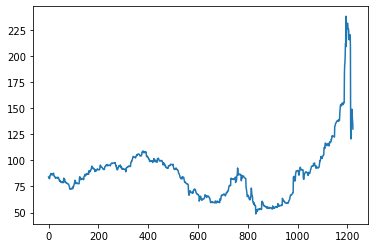

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the Scale of the data, so we apply MinMax Scaler

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(1223, 1)

In [12]:
print(df1)

[[0.18652576]
 [0.18361955]
 [0.18414795]
 ...
 [0.47952444]
 [0.46499339]
 [0.42932629]]


In [13]:
## Splitting the dataset into train test split

In [14]:
train_size=int(len(df1)*0.65)
test_size=len(df1-train_size)
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [15]:
len(train_data),len(test_data)

(794, 429)

In [16]:
train_data

array([[0.18652576],
       [0.18361955],
       [0.18414795],
       [0.18124174],
       [0.17807133],
       [0.18546896],
       [0.19418758],
       [0.19630119],
       [0.19498018],
       [0.20449141],
       [0.20290621],
       [0.1997358 ],
       [0.2015852 ],
       [0.2010568 ],
       [0.198679  ],
       [0.19815059],
       [0.19709379],
       [0.19815059],
       [0.20369881],
       [0.20369881],
       [0.20607662],
       [0.1992074 ],
       [0.19233818],
       [0.19101717],
       [0.18811096],
       [0.18811096],
       [0.18705416],
       [0.18467635],
       [0.18018494],
       [0.18388375],
       [0.18361955],
       [0.18335535],
       [0.18441215],
       [0.18414795],
       [0.18414795],
       [0.18229855],
       [0.18441215],
       [0.18282695],
       [0.18467635],
       [0.18494055],
       [0.17965654],
       [0.17965654],
       [0.17490092],
       [0.17278732],
       [0.1664465 ],
       [0.1661823 ],
       [0.16961691],
       [0.164

In [17]:
def create_dataset(dataset, time_step=1):
    datax, datay = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(datax), np.array(datay)

In [49]:
# reshape into x=t,t+1, t+2, t+3 and y=t+4
time_step=15
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [50]:
print(X_train.shape), print(y_train.shape)

(778, 15)
(778,)


(None, None)

In [51]:
print(X_test.shape), print(ytest.shape)

(413, 15)
(413,)


(None, None)

In [52]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [53]:
#Create the Stack LSTM Model 
import tensorflow

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 15, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 15, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train, y_train, validation_data=(X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 112ms/step - loss: 0.0109 - val_loss: 0.0239
Epoch 2/100
13/13 [==============================] - 0s 27ms/step - loss: 0.0023 - val_loss: 0.0131
Epoch 3/100
13/13 [==============================] - 0s 26ms/step - loss: 0.0012 - val_loss: 0.0110
Epoch 4/100
13/13 [==============================] - 0s 27ms/step - loss: 5.5676e-04 - val_loss: 0.0067
Epoch 5/100
13/13 [==============================] - 0s 27ms/step - loss: 2.5571e-04 - val_loss: 0.0055
Epoch 6/100
13/13 [==============================] - 0s 27ms/step - loss: 2.1870e-04 - val_loss: 0.0054
Epoch 7/100
13/13 [==============================] - 0s 26ms/step - loss: 2.1009e-04 - val_loss: 0.0054
Epoch 8/100
13/13 [==============================] - 0s 27ms/step - loss: 2.1080e-04 - val_loss: 0.0054
Epoch 9/100
13/13 [==============================] - 0s 28ms/step - loss: 2.1249e-04 - val_loss: 0.0054
Epoch 10/100
13/13 [==============================] - 0s 27ms/step - loss: 

Epoch 79/100
13/13 [==============================] - 0s 32ms/step - loss: 1.3011e-04 - val_loss: 0.0020
Epoch 80/100
13/13 [==============================] - 0s 35ms/step - loss: 1.0148e-04 - val_loss: 0.0020
Epoch 81/100
13/13 [==============================] - 0s 36ms/step - loss: 1.0017e-04 - val_loss: 0.0020
Epoch 82/100
13/13 [==============================] - 0s 34ms/step - loss: 9.9828e-05 - val_loss: 0.0020
Epoch 83/100
13/13 [==============================] - 0s 36ms/step - loss: 1.0124e-04 - val_loss: 0.0020
Epoch 84/100
13/13 [==============================] - 1s 43ms/step - loss: 1.0984e-04 - val_loss: 0.0019
Epoch 85/100
13/13 [==============================] - 1s 42ms/step - loss: 1.0514e-04 - val_loss: 0.0019
Epoch 86/100
13/13 [==============================] - 0s 26ms/step - loss: 9.8606e-05 - val_loss: 0.0019
Epoch 87/100
13/13 [==============================] - 0s 27ms/step - loss: 1.0111e-04 - val_loss: 0.0020
Epoch 88/100
13/13 [==============================] - 0

In [61]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [62]:
## Transform to Original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [63]:
## calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

86.5509957868124

In [64]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

103.35170610340874

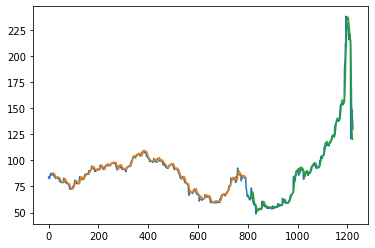

In [66]:
### PLotting 
#Shift train prediction for plotting
look_back=15
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#Plot base line and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [67]:
len(test_data)

429

In [68]:
x_input=test_data[414:].reshape(1,-1)
x_input.shape

(1, 15)

In [69]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [70]:
temp_input

[0.904887714663144,
 0.904887714663144,
 0.904887714663144,
 0.9067371202113605,
 0.8520475561426684,
 0.42879788639365923,
 0.3791281373844121,
 0.4742404227212682,
 0.5085865257595773,
 0.5019815059445178,
 0.5297225891677675,
 0.5138705416116248,
 0.4795244385733157,
 0.4649933949801849,
 0.42932628797886396]

In [71]:
import numpy as np
lst_output = []
n_steps=15
i=0
while(i<7):
    
    if(len(temp_input)>15):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input{}". format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1, n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.3994536]
16
1 day input[0.90488771 0.90488771 0.90673712 0.85204756 0.42879789 0.37912814
 0.47424042 0.50858653 0.50198151 0.52972259 0.51387054 0.47952444
 0.46499339 0.42932629 0.39945361]
1 day output [[0.40648264]]
2 day input[0.90488771 0.90673712 0.85204756 0.42879789 0.37912814 0.47424042
 0.50858653 0.50198151 0.52972259 0.51387054 0.47952444 0.46499339
 0.42932629 0.39945361 0.40648264]
2 day output [[0.40918767]]
3 day input[0.90673712 0.85204756 0.42879789 0.37912814 0.47424042 0.50858653
 0.50198151 0.52972259 0.51387054 0.47952444 0.46499339 0.42932629
 0.39945361 0.40648264 0.40918767]
3 day output [[0.4095267]]
4 day input[0.85204756 0.42879789 0.37912814 0.47424042 0.50858653 0.50198151
 0.52972259 0.51387054 0.47952444 0.46499339 0.42932629 0.39945361
 0.40648264 0.40918767 0.40952671]
4 day output [[0.40949738]]
5 day input[0.42879789 0.37912814 0.47424042 0.50858653 0.50198151 0.52972259
 0.51387054 0.47952444 0.46499339 0.42932629 0.39945361 0.40648264
 0.409187

In [72]:
day_new=np.arange(1,16)
day_pred=np.arange(16,23)

In [73]:
day_new.shape

(15,)

In [74]:
import matplotlib.pyplot as plt

In [75]:
len(df1)

1223

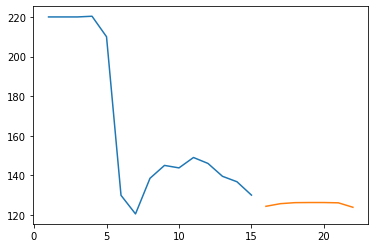

In [78]:
plt.plot(day_new, scaler.inverse_transform(df1[1208:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [79]:
df3=df1.tolist()

In [80]:
df3.extend(lst_output)

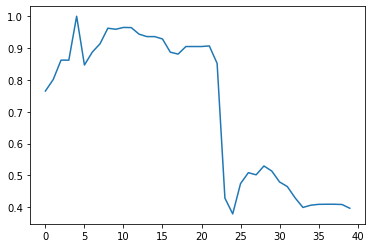

In [81]:
plt.plot(df3[1190:])

In [82]:
df3=scaler.inverse_transform(df3).tolist()

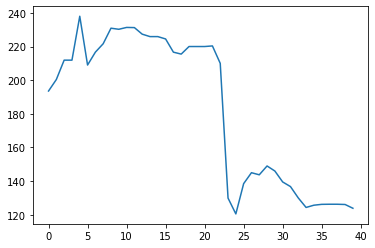

In [84]:
plt.plot(df3[1190:])